In [1]:
import numpy as np
import matplotlib.pyplot as plt

class BernoulliBandit:  # 基于伯努利分布的 K 臂老虎机

    def __init__(self, K):
        self.prob = np.random.uniform(size=K)
        self.best_index = np.argmax(self.prob)
        self.best_prob = self.prob[self.best_index]
        self.K = K

    def step(self, K):
        if np.random.rand() < self.prob[K]:
            return 1
        else:
            return 0
    
np.random.seed(1)
K = 5
bandit_5_arms = BernoulliBandit(K)
print("The best index is ",bandit_5_arms.best_index)
print("The winning rate is ",bandit_5_arms.best_prob)


The best index is  1
The winning rate is  0.7203244934421581


In [5]:
class Solver:

    def __init__(self, bandit):
        self.bandit = bandit
        self.counts = np.zeros(self.bandit.K)                             # 构造一个初始全为0 的数组，来计数每根摇杆摇到的次数
        self.regret = 0.
        self.action = []
        self.regrets = []

    def update_regret(self, bandit_index):
        self.regret += self.bandit.best_prob - self.bandit.prob[bandit_index]
        self.regrets.append(self.regret)
    
    def run_one_step(self):
        raise NotImplementedError                                         # 父类中不提供具体的实现，由子类提供,返回具体选择的 badit_index

    def run(self, num_steps): 
        for _ in range(num_steps):
            k_temp = self.run_one_step()
            self.counts[k_temp] += 1
            self.action.append(k_temp)
            self.update_regret(k_temp)


In [6]:
class EpsilonGreedy(Solver):

    def __init__(self, bandit, epsilon = 0.01, init_prob = 1.0):
        super(EpsilonGreedy, self).__init__(bandit)
        self.epsilon = epsilon
        self.estimate_reward = np.array([init_prob]*self.bandit.K)
    
    def run_one_step(self):
        if np.random.random() < self.epsilon:
            k = np.random.randint(0, self.bandit.K)
        else:
            k = np.argmax(self.estimate_reward)
        
        r = self.bandit.step(k)
        self.estimate_reward[k] += 1.0 / (self.counts[k] + 1) * (r - self.estimate_reward[k])
        return k

epsilon-greedy cumulative regret is ： 21.677141766164194


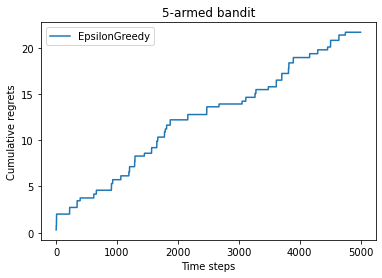

In [7]:
def plot_results(solvers, solver_names):
    """生成累积懊悔随时间变化的图像。输入solvers是一个列表,列表中的每个元素是一种特定的策略。
    而solver_names也是一个列表,存储每个策略的名称"""
    for idx, solver in enumerate(solvers):
        time_list = range(len(solver.regrets))
        plt.plot(time_list, solver.regrets, label=solver_names[idx])
    plt.xlabel('Time steps')
    plt.ylabel('Cumulative regrets')
    plt.title('%d-armed bandit' % solvers[0].bandit.K)
    plt.legend()
    plt.show()


np.random.seed(1)
epsilon_greedy_solver = EpsilonGreedy(bandit_5_arms, epsilon=0.01)
epsilon_greedy_solver.run(5000)
print('epsilon-greedy cumulative regret is ：', epsilon_greedy_solver.regret)
plot_results([epsilon_greedy_solver], ["EpsilonGreedy"])

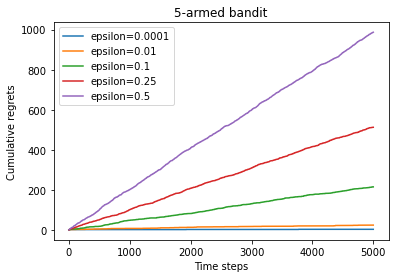

In [8]:
np.random.seed(0)
epsilons = [1e-4, 0.01, 0.1, 0.25, 0.5]
epsilon_greedy_solver_list = [
    EpsilonGreedy(bandit_5_arms, epsilon=e) for e in epsilons
]
epsilon_greedy_solver_names = ["epsilon={}".format(e) for e in epsilons]
for solver in epsilon_greedy_solver_list:
    solver.run(5000)

plot_results(epsilon_greedy_solver_list, epsilon_greedy_solver_names)